In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.mode.chained_assignment = None # ignore warning

%matplotlib inline

In [2]:
cars = pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
# Assign the columns names
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Data Cleaning
1. Replace all of the ? values with the `numpy.nan` missing value.
2. Handle missing values.
3. Normalize numerical columns, all values range from 0 to 1.

In [5]:
cars = cars.replace('?', np.nan)
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

- Comment: There are some numerical columns with wrong dtype, need to convert them into '`int`' or '`float`'.

In [7]:
# Convert dtypes
numerical = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
             'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm',
             'city-mpg', 'highway-mpg', 'price']

cars_updated = cars.copy()

for i in numerical:
    cars_updated[i] = cars_updated[i].astype('float')
        
cars_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    float64
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
print(cars_updated['num-of-doors'].unique())
print(cars_updated['num-of-cylinders'].unique())

['two' 'four' nan]
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [9]:
# Create dictionary to replace words with numeric values
replace_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, 
                "twelve": 12}

# Replace num-of-doors, num-of-cylinders with numeric values
cars_updated = cars_updated.replace({"num-of-doors": replace_dict, "num-of-cylinders": replace_dict})

cars_updated.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,6,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,4,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,5,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [10]:
# Count missing values for all columns
cars_updated.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
# Replace NaN values with columns' mean.
for col in cars_updated.columns:
    if cars_updated[col].dtype in ['int64', 'float64']:
        cars_updated[col].fillna(cars_updated[col].mean(), inplace = True)
        
cars_updated.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
cars_updated.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,122.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,6,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,4,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,5,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [13]:
# Normalize all numeric columns using Min-Max scaling
def MinMax(df):
    df_norm = df.copy()
    for column in df_norm.columns:
        if df_norm[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
            df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
    return df_norm

cars_normalized = MinMax(cars_updated)

# Put the original price back
cars_normalized['price'] = cars_updated['price']

cars_normalized.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.298429,alfa-romero,gas,std,0.0,convertible,rwd,front,0.058309,0.413433,0.316667,0.083333,0.411171,dohc,0.2,0.260377,mpfi,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,alfa-romero,gas,std,0.0,convertible,rwd,front,0.058309,0.413433,0.316667,0.083333,0.411171,dohc,0.2,0.260377,mpfi,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,alfa-romero,gas,std,0.0,hatchback,rwd,front,0.230321,0.449254,0.433333,0.383333,0.517843,ohcv,0.4,0.343396,mpfi,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,audi,gas,std,1.0,sedan,fwd,front,0.384840,0.529851,0.491667,0.541667,0.329325,ohc,0.2,0.181132,mpfi,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,audi,gas,std,1.0,sedan,4wd,front,0.373178,0.529851,0.508333,0.541667,0.518231,ohc,0.3,0.283019,mpfi,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0


### K-nearest neighbors (KNN) model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(feature_col, target_col, df, k):
    # Split the dataset into training and test sets
    X = df[feature_col]
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = knn.predict(X_test)

    # Calculate the RMSE
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    return rmse

In [15]:
# Test function with one feature column
display(knn_train_test(["wheel-base"], "price", cars_normalized,1))

# Test function with two feature columns
display(knn_train_test(["wheel-base", "horsepower"], "price", cars_normalized,3))

2885.031233856646

3689.0553949916603

### Univariate KNN

In [16]:
# Extract features
numeric_columns = cars_normalized.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('price')

In [17]:
uni_knn_results = []
k_vals = [1,3,5,7,9]

for col in numeric_columns:
    for k in k_vals:
        rmse_values = knn_train_test([col], 'price', cars_normalized, k)
        uni_knn_results.append([col, k, rmse_values])
        
# Convert the list of lists to a dataframe
uni_knn_results_df = pd.DataFrame(uni_knn_results, columns = ['feature', 'k', 'RMSE'])

uni_knn_results_df.head(20)

,feature,k,RMSE
0,symboling,1,7879.238407
1,symboling,3,7739.768748
2,symboling,5,7366.710239
3,symboling,7,7097.817875
4,symboling,9,6627.047015
5,normalized-losses,1,6460.374663
6,normalized-losses,3,6020.798555
7,normalized-losses,5,5878.456024
8,normalized-losses,7,6019.519014
9,normalized-losses,9,6530.345895


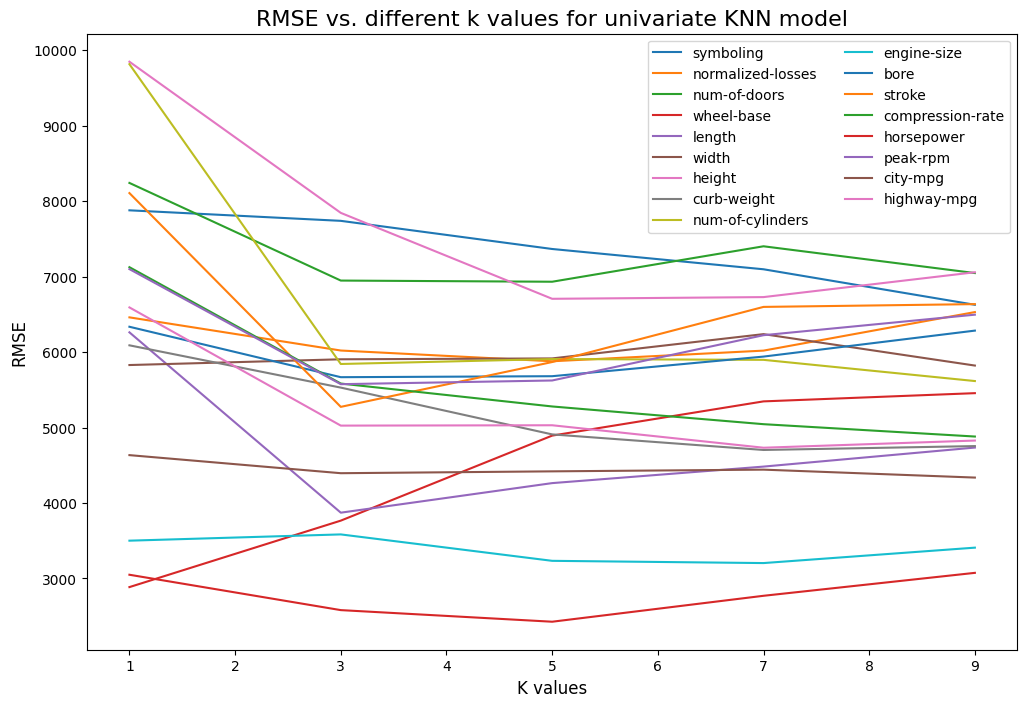

In [18]:
fig, ax = plt.subplots(figsize = (12,8))

# Plot a line for every feature
for feature in numeric_columns:
    plt.plot(uni_knn_results_df[uni_knn_results_df['feature']==feature]['k'], 
             uni_knn_results_df[uni_knn_results_df['feature']==feature]['RMSE'])
    
# Set various drawing attributes
ax.set_xlabel('K values', size=12)
ax.set_ylabel('RMSE', size=12)
plt.title('RMSE vs. different k values for univariate KNN model',size=16)
plt.legend(numeric_columns, ncol = 2)

plt.show()

In [19]:
# Show top 10 results with the lowest RMSE
uni_knn_results_df.sort_values('RMSE').head(10)

,feature,k,RMSE
67,horsepower,5,2426.037942
66,horsepower,3,2579.884096
68,horsepower,7,2769.808124
15,wheel-base,1,2885.031234
65,horsepower,1,3048.781156
69,horsepower,9,3073.817962
48,engine-size,7,3203.452258
47,engine-size,5,3233.183318
49,engine-size,9,3407.885408
45,engine-size,1,3500.329559


#### Calculate the average of RMSE within features, and choose Top 5

In [20]:
avg_rmse_table = []
for key in uni_knn_results_df.feature.unique():
    avg_rmse = uni_knn_results_df[(uni_knn_results_df['feature'] == key)]['RMSE'].mean()
    avg_rmse_table.append([key, avg_rmse])

avg_rmse_table = pd.DataFrame(avg_rmse_table,columns=['feature', 'avg_RMSE']).sort_values(by='avg_RMSE').reset_index(drop=True)
avg_rmse_table

,feature,avg_RMSE
0,horsepower,2779.665856
1,engine-size,3385.647833
2,city-mpg,4445.353038
3,wheel-base,4469.291376
4,length,4722.709947
5,curb-weight,5196.997381
6,highway-mpg,5241.560619
7,compression-rate,5582.624604
8,width,5941.787131
9,bore,5981.759447


- Form abouve, we can see the top 5 features are: `length`, `engine-size`, `horsepower`, `wheel-base`, and `curb-weight`.

### Multivariate KNN Model with single k value (deault k=5)

In [21]:
features = {
        'best_2': ['horsepower', 'engine-size'],
        'best_3': ['horsepower', 'engine-size', 'city-mpg'],
        'best_4': ['horsepower', 'engine-size', 'city-mpg', 'wheel-base'],
        'best_5': ['horsepower', 'engine-size', 'city-mpg', 'wheel-base','wheel-base'],
        'best_6': ['horsepower', 'engine-size', 'city-mpg', 'wheel-base','wheel-base', 'curb-weight']
    } 

multi_rmses = {}
k = 5

for key, value in features.items():
    multi_rmses[key] = knn_train_test(value, 'price', cars_normalized, k)
    
pd.Series(multi_rmses).sort_values()

best_2    2678.035771
best_3    2899.913442
best_4    3767.017656
best_6    4247.140357
best_5    4325.923622
dtype: float64

### Multivariate KNN Model with multiple k values
### Hyperparameter tuning

From the top 3 models in the last section (those using `'best_2'`, `'best_3'`, and `'best_4'` as features).<br>
Let's see how they perform when tuning the k value from 1 to 20.

In [22]:
top_feature_subsets = {
    'best_2': ['horsepower', 'engine-size'],
    'best_3': ['horsepower', 'engine-size', 'city-mpg'],
    'best_4': ['horsepower', 'engine-size', 'city-mpg', 'wheel-base']
} 

k_vals = list(range(1, 21))

multi_k_rmses = {}

# Iterate over each subset and k value to compute RMSE
for key, value in top_feature_subsets.items():
    rmse_values = []  # List to store RMSE values for each k
    
    for k in k_vals:
        rmse_values.append(knn_train_test(value, 'price', cars_normalized, k))
    
    multi_k_rmses[key] = rmse_values

# To find the minimum RMSE subsets and its corresponding k value
best_k = {}
for subsets, v in multi_k_rmses.items():
    best_k[subsets] = [min(v), str(v.index(min(v))+1)]
    
print("Minimum RMSE values for each subset:")
print(best_k)

Minimum RMSE values for each subset:
{'best_2': [2279.5367415546434, '4'], 'best_3': [2490.801024842556, '3'], 'best_4': [2529.0481338666996, '1']}


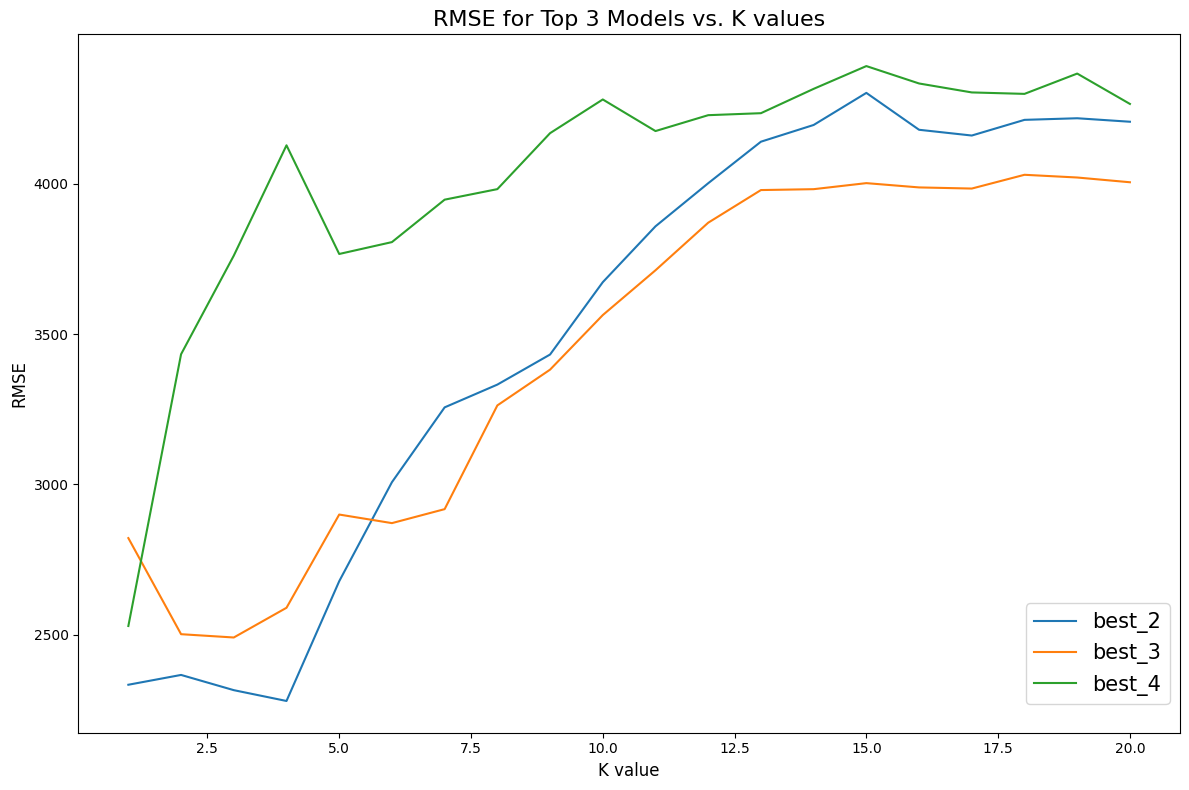

In [23]:
# Plot results
fig, ax = plt.subplots(1, figsize = (12,8), dpi=100)

for key, values in multi_k_rmses.items():
    ax.plot(k_vals, values, label=key)
    ax.set_xlabel('K value', size=12)
    ax.set_ylabel('RMSE', size=12)
    ax.set_title('RMSE for Top 3 Models vs. K values', size=16)
    ax.legend(bbox_to_anchor=(1, 0.2), prop={'size': 15})

plt.tight_layout()
plt.show()

#### **The best results for each feature subsuets are:**

- `'best_2'`: RMSE of 2279.53 dollars, for k=4
- `'best_3'`: RMSE of 2490.80 dollars, for k=3
- `'best_4'`: RMSE of 2529.04 dollars, for k=1

Now, we need to find a best feature subset and K value through `Cross-Validation`.

### Cross-Validation
- Here we use `K-Fold`, `SelectKbest`, `f_regression` is used to compute p-values for linear relationships.
- We change `RMSE` to `1 - MAPE` for getting average accuracy, the higher the better.
- Then we use `combinations` tool to iterate over features and get the best accuracy.

In [24]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import KFold

def knn_cross_validation(feature_cols, target_col, df, k, num_features_to_select=None):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    avg_accuracy_list = []
    for train_index, test_index in kfold.split(df):
        X_train, X_test = df.iloc[train_index][feature_cols], df.iloc[test_index][feature_cols]
        y_train, y_test = df.iloc[train_index][target_col], df.iloc[test_index][target_col]
        
        # Perform feature selection if num_features_to_select is specified
        if num_features_to_select:
            selector = SelectKBest(score_func=f_regression, k=num_features_to_select)
            X_train = selector.fit_transform(X_train, y_train)
            X_test = selector.transform(X_test)
        
        # Fit KNN model and calculate MAPE
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
        accuracy = 100 - mape
        avg_accuracy_list.append(accuracy)
    
    avg_accuracy = np.mean(avg_accuracy_list)
        
    return avg_accuracy

In [25]:
from itertools import combinations

def find_best_feature_subset(feature_cols, target_col, df, k_values):
    best_avg_acc = 0
    best_feature_subset = None
    best_k = None

    # Generate all possible combinations of feature subsets
    for num_features_to_select in range(1, len(feature_cols) + 1):
        for feature_subset in combinations(feature_cols, num_features_to_select):
            for k in k_values:
                # Compute the average RMSE using cross-validation
                avg_accuracy = knn_cross_validation(list(feature_subset), target_col, df, k)
                
                # Update the best feature subset and k value if a new maximen accuracy is found
                if avg_accuracy > best_avg_acc:
                    best_avg_acc = avg_accuracy
                    best_feature_subset = feature_subset
                    best_k = k
    
    return best_feature_subset, best_k, best_avg_acc

In [26]:
# Example usage:
features = ['horsepower', 'engine-size', 'city-mpg', 'wheel-base', 'wheel-base', 'curb-weight',
            'highway-mpg','peak-rpm']
k_values =  list(range(1, 6))

best_feature_subset, best_k, best_avg_acc = find_best_feature_subset(features, 'price', cars_normalized, k_values)

print("Best Feature Subset:", best_feature_subset)
print("Best k Value:", best_k)
print("Best Average Accurcy:", best_avg_acc)

Best Feature Subset: ('city-mpg', 'wheel-base', 'curb-weight', 'highway-mpg', 'peak-rpm')
Best k Value: 1
Best Average Accurcy: 86.43722606898343


In [27]:
k_values =  list(range(1, 6))
results = []
for num_features_to_select in range(1, len(features) + 1):
    for feature_subset in combinations(features, num_features_to_select):
        for k in k_values:
        # Compute the average RMSE using cross-validation
            accuracy = knn_cross_validation(list(feature_subset), 'price', cars_normalized, k)
            results.append([feature_subset,k,num_features_to_select, accuracy])
            
results_df = pd.DataFrame(results, columns = ['feature subset', 'k', 'Numbers of feature','Accuracy'])        
results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True).head(10)

,feature subset,k,Numbers of feature,Accuracy
0,"(city-mpg, wheel-base, curb-weight, highway-mp...",1,5,86.437226
1,"(city-mpg, wheel-base, curb-weight, highway-mp...",1,5,86.437226
2,"(horsepower, engine-size, city-mpg, curb-weight)",1,4,86.318819
3,"(city-mpg, wheel-base, curb-weight, highway-mp...",2,5,86.201794
4,"(city-mpg, wheel-base, curb-weight, highway-mp...",2,5,86.201794
5,"(horsepower, engine-size, curb-weight, highway...",1,4,86.108697
6,"(horsepower, wheel-base, wheel-base, curb-weig...",2,5,86.091110
7,"(city-mpg, wheel-base, wheel-base, curb-weight)",1,4,86.014131
8,"(horsepower, engine-size, wheel-base, curb-wei...",2,5,85.962826
9,"(horsepower, engine-size, wheel-base, curb-wei...",2,5,85.962826


### Conclusion:

- Best Feature Subset: ('city-mpg', 'wheel-base', 'curb-weight', 'highway-mpg', 'peak-rpm') <br>Best k Value: 1 <br>Best Average Accurcy: 86.43%

### Future Step:
- With the multivariate KNN hyperparameter tuning, we used `f_regression` scoring function for best feature subset selection. <br>
- However, `f_regression` only examines the linear relationship between features and target, and return `p-value`. <br>
- We can further apply `Mutual Information` function from `Scikit-learn` for feature selection, to see if non-linear results can make the prediction better.
- We only used numerical features for prediction. It is interesting to explore how combinations of categorical and numeric features ​​can achieve better accuracy by implementing `One-Hot Encoding`.